In [1]:
# Closed eye and Open eye Model

In [2]:
# Importing the Libraries

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error

In [4]:
# LOAD THE DATASET
# Load Closed Eye Images → Label = 0
# Load Opened Eye Images → Label = 1

In [5]:
base_path = r"D:\Swathi\Drowsiness detection\train"
closed_path = os.path.join(base_path, "Closed_Eyes")
open_path = os.path.join(base_path, "Open_Eyes")

X, y = [], []

for file in os.listdir(closed_path):
    if file.endswith(".png"):
        img_path = os.path.join(closed_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, (24, 24))
        X.append(img)
        y.append(0)

for file in os.listdir(open_path):
    if file.endswith(".png"):
        img_path = os.path.join(open_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, (24, 24))
        X.append(img)
        y.append(1)
print(f"Total images loaded: {len(X)} (Closed: {y.count(0)}, Open: {y.count(1)})")

Total images loaded: 4000 (Closed: 2000, Open: 2000)


In [6]:
# Preprocessing

In [7]:
X = np.array(X).reshape(-1, 24, 24, 1) / 255.0
y = to_categorical(y, num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 22, 22, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 150,274 (587.01 KB)

 Trainable params: 150,274 (587.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.6955 - loss: 0.5546 - val_accuracy: 0.9391 - val_loss: 0.1939
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9413 - loss: 0.1669 - val_accuracy: 0.9688 - val_loss: 0.1236
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9689 - loss: 0.1078 - val_accuracy: 0.9828 - val_loss: 0.0659
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9773 - loss: 0.0691 - val_accuracy: 0.9766 - val_loss: 0.0699
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9750 - loss: 0.0667 - val_accuracy: 0.9906 - val_loss: 0.0373
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9850 - loss: 0.0471 - val_accuracy: 0.9875 - val_loss: 0.0312
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9843 - loss: 0.0470 - val_accuracy: 0.9891 - val_loss: 0.0340
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9920 - loss: 0.0266 - val_accuracy: 0.9953 - v

In [8]:
# Save the Model

In [9]:
model.save("drowsiness_model.h5")


In [10]:
# Evaluation

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

 Confusion Matrix:
[[422   0]
 [  5 373]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       422
           1       1.00      0.99      0.99       378

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



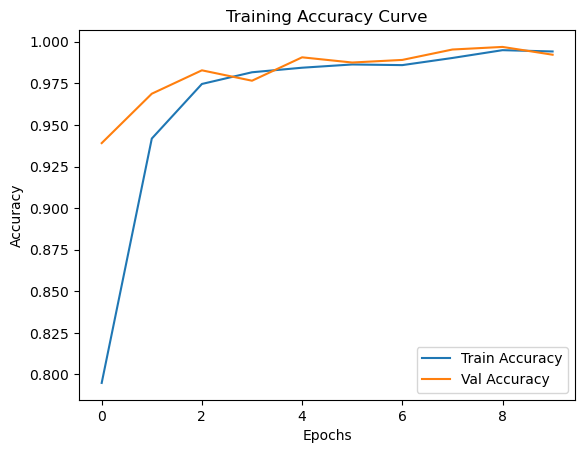

In [11]:
y_pred = model.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

print("\n Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))

print("\n Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Curve")
plt.legend()
plt.show()

In [12]:
# Age Prediction Model

In [13]:
# Load the dataset

In [14]:
utkface_path = r"D:\Swathi\UTK face\UTKFace"
X, y = [], []

In [15]:
# Preprocess and Train

In [16]:
for file in os.listdir(utkface_path):
    if file.endswith('.jpg'):
        try:
            age = int(file.split('_')[0])
            if age < 5 or age > 90:
                continue 
            img_path = os.path.join(utkface_path, file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))
            X.append(img)
            y.append(age / 100.0) 
        except:
            continue

X = np.array(X, dtype="float32") / 255.0
y = np.array(y, dtype="float32")

print(f" Loaded {len(X)} images.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Loaded 21454 images.


In [17]:
# Model

In [18]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1) 
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 50s 104ms/step - loss: 0.6760 - mae: 0.2957 - val_loss: 0.0608 - val_mae: 0.1961
Epoch 2/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 46s 106ms/step - loss: 0.0385 - mae: 0.1486 - val_loss: 0.0295 - val_mae: 0.1267
Epoch 3/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 45s 105ms/step - loss: 0.0285 - mae: 0.1265 - val_loss: 0.0331 - val_mae: 0.1330
Epoch 4/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - loss: 0.0227 - mae: 0.1093 - val_loss: 0.0234 - val_mae: 0.1093
Epoch 5/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 44s 101ms/step - loss: 0.0194 - mae: 0.1029 - val_loss: 0.0182 - val_mae: 0.1011
Epoch 6/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - loss: 0.0193 - mae: 0.1036 - val_loss: 0.0174 - val_mae: 0.0990
Epoch 7/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 34s 80ms/step - loss: 0.0190 - mae: 0.1024 - val_loss: 0.0176 - val_mae: 0.0992
Epoch 8/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 34s 80ms/step - loss: 0.0180 - mae: 0.0998 - val_loss: 0.0185 - val_mae: 0.1016
Epoch 9/25
430/430 ━━━━━━━━━━━━━━━━━

In [19]:
# Save the model

In [20]:
model.save("age_model.h5")

In [21]:
# Evaluation

135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
Mean Absolute Error on test data: 8.59 years


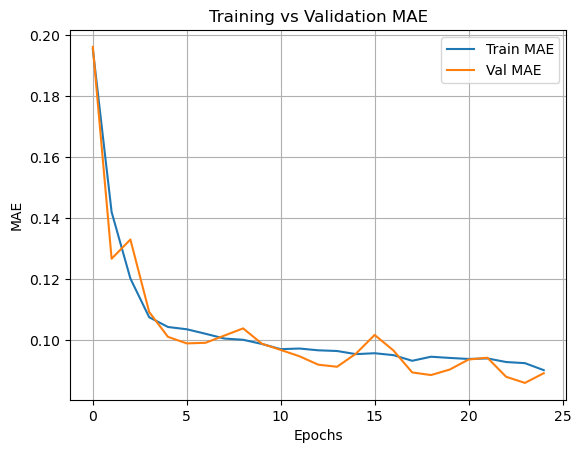

In [22]:
y_pred = model.predict(X_test).flatten()
y_pred_actual = y_pred * 100
y_test_actual = y_test * 100

mae = mean_absolute_error(y_test_actual, y_pred_actual)
print(f"Mean Absolute Error on test data: {mae:.2f} years")

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title("Training vs Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.grid()
plt.show()